Image Data Analysis with RNN (Recurrent Neural Networks)
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5802 - loss: 1.2971
Epoch 1: accuracy improved from -inf to 0.73130, saving model to mnist_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5805 - loss: 1.2962 - val_accuracy: 0.8710 - val_loss: 0.4452
Epoch 2/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8803 - loss: 0.4120
Epoch 2: accuracy improved from 0.73130 to 0.88867, saving model to mnist_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.8803 - loss: 0.4119 - val_accuracy: 0.9094 - val_loss: 0.3141
Epoch 3/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9116 - loss: 0.3083
Epoch 3: accuracy improved from 0.88867 to 0.91458, saving model to mnist_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9116 - loss: 0.3082 - val_accuracy: 0.9267 - val_loss: 0.2574
Epoch 4/10
466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9247 - loss: 0.2606
Epoch 4: accuracy improved from 0.91458 to

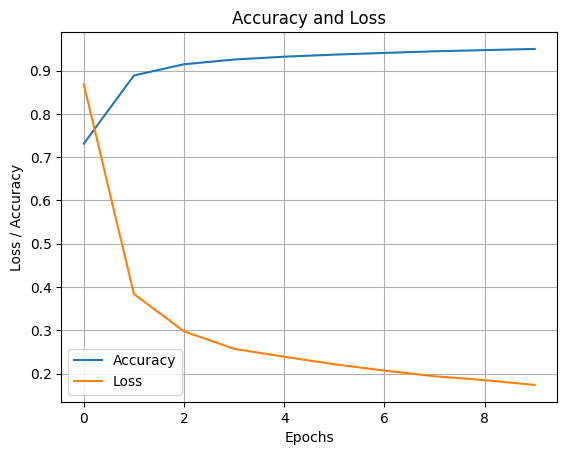

In [1]:
from keras import Sequential
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from keras.layers import Dense, SimpleRNN, LSTM, GRU, Activation

print("Image Data Analysis with RNN (Recurrent Neural Networks)")

(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

xtrain1 = xtrain
xtest1 = xtest

xtrain = xtrain/255.0
xtest = xtest/255.0
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

model = Sequential()
model.add(SimpleRNN(50, input_shape=(28,28)))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint=ModelCheckpoint('mnist_model.keras', verbose=1, monitor='accuracy', save_best_only=True)
history = model.fit(xtrain, ytrain, batch_size=128, epochs=10, verbose=1, validation_data=(xtest, ytest), callbacks=[checkpoint] )


scores = model.evaluate(xtest, ytest)
print("Loss")
print(scores[0])
print("Accuracy")
print(scores[1])


his = pd.DataFrame(history.history)
fig1 = plt.figure()
plt.plot(his['accuracy'], label="Accuracy")
plt.plot(his['loss'], label="Loss")
plt.legend()
plt.title("Accuracy and Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.grid()
plt.show(fig1)

Enter a image sample id (0-9999):720


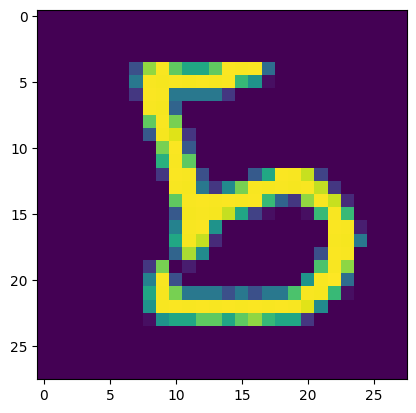

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
[[2.2806110e-02 4.3313464e-04 8.0589078e-02 4.4933487e-02 4.0897857e-03
  2.3424810e-01 3.9032788e-03 6.0435297e-05 5.6962883e-01 3.9307762e-02]]

The number is given below : 
[8]


In [3]:
from keras.models import load_model

# load model
model_pred_rnn = load_model("mnist_model.keras") # Changed the filename to match the saved model
#load data
(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

n1 = int(input("Enter a image sample id (0-9999):"))

# display the image from the mnnist database below
fig1=plt.figure()
plt.imshow(xtest1[n1])
plt.show(fig1)

# Input
sample = xtest[n1].reshape((1, 28, 28)) / 255.0

target_sp = model_pred_rnn.predict(sample)
print(target_sp)
out = np.argmax(target_sp, axis=1)
print("\r\nThe number is given below : ")
print(out)

Image Data Analysis with RNN (Recurrent Neural Networks)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5519 - loss: 1.3328
Epoch 1: accuracy improved from -inf to 0.74517, saving model to mnist_lstm_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.5523 - loss: 1.3316 - val_accuracy: 0.9165 - val_loss: 0.2858
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9208 - loss: 0.2643
Epoch 2: accuracy improved from 0.74517 to 0.93172, saving model to mnist_lstm_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9209 - loss: 0.2642 - val_accuracy: 0.9450 - val_loss: 0.1845
Epoch 3/10
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9539 - loss: 0.1581
Epoch 3: accuracy improved from 0.93172 to 0.95487, saving model to mnist_lstm_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9539 - loss: 0.1580 - val_accuracy: 0.9554 - val_loss: 0.1405
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9637 - loss: 0.1248
Epoch 4: accuracy improve

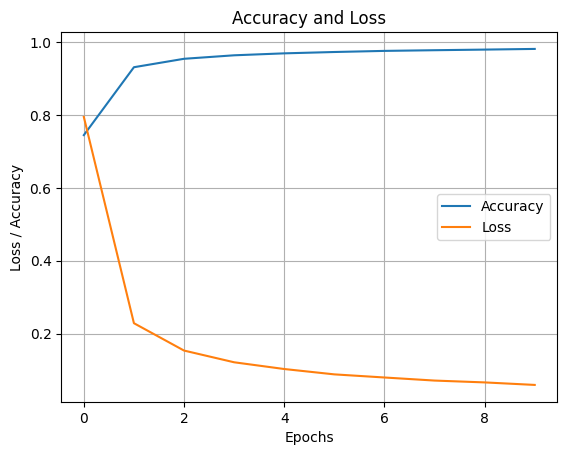

In [4]:
from keras import Sequential
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from keras.layers import Dense, SimpleRNN, LSTM, GRU, Activation

print("Image Data Analysis with RNN (Recurrent Neural Networks)")

(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

xtrain1 = xtrain
xtest1 = xtest

xtrain = xtrain/255.0
xtest = xtest/255.0
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

model = Sequential()
model.add(LSTM(50, input_shape=(28,28)))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint=ModelCheckpoint('mnist_lstm_model.keras', verbose=1, monitor='accuracy', save_best_only=True)
history = model.fit(xtrain, ytrain, batch_size=128, epochs=10, verbose=1, validation_data=(xtest, ytest), callbacks=[checkpoint] )


scores = model.evaluate(xtest, ytest)
print("Loss")
print(scores[0])
print("Accuracy")
print(scores[1])


his = pd.DataFrame(history.history)
fig1 = plt.figure()
plt.plot(his['accuracy'], label="Accuracy")
plt.plot(his['loss'], label="Loss")
plt.legend()
plt.title("Accuracy and Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.grid()
plt.show(fig1)

Enter a image sample id (0-9999):3


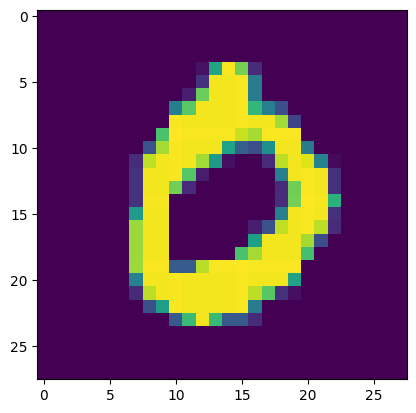

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
[[9.9537200e-01 2.4057088e-06 1.8238733e-04 2.7919275e-04 2.5354739e-04
  3.7275365e-04 8.8646164e-04 1.5857100e-05 3.5941179e-04 2.2759466e-03]]

The number is given below : 
[0]


In [5]:
from keras.models import load_model

# load model
model_pred_rnn = load_model("mnist_lstm_model.keras") # Changed the filename to match the saved model
#load data
(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

n1 = int(input("Enter a image sample id (0-9999):"))

# display the image from the mnnist database below
fig1=plt.figure()
plt.imshow(xtest1[n1])
plt.show(fig1)

# Input
sample = xtest[n1].reshape((1, 28, 28)) / 255.0

target_sp = model_pred_rnn.predict(sample)
print(target_sp)
out = np.argmax(target_sp, axis=1)
print("\r\nThe number is given below : ")
print(out)

Image Data Analysis with RNN (Recurrent Neural Networks)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4912 - loss: 1.4718
Epoch 1: accuracy improved from -inf to 0.69058, saving model to mnist_gru_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.4916 - loss: 1.4706 - val_accuracy: 0.8943 - val_loss: 0.3698
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9057 - loss: 0.3260
Epoch 2: accuracy improved from 0.69058 to 0.91672, saving model to mnist_gru_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9057 - loss: 0.3259 - val_accuracy: 0.9422 - val_loss: 0.2060
Epoch 3/10
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9413 - loss: 0.2066
Epoch 3: accuracy improved from 0.91672 to 0.94412, saving model to mnist_gru_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9414 - loss: 0.2065 - val_accuracy: 0.9499 - val_loss: 0.1740
Epoch 4/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9555 - loss: 0.1569
Epoch 4: accuracy improved f

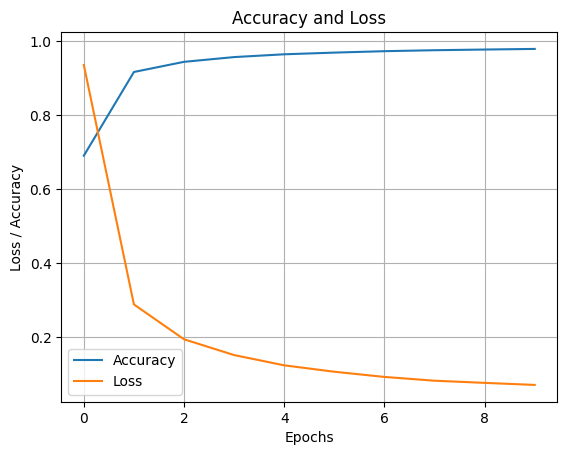

In [6]:
from keras import Sequential
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from keras.layers import Dense, SimpleRNN, LSTM, GRU, Activation

print("Image Data Analysis with RNN (Recurrent Neural Networks)")

(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

xtrain1 = xtrain
xtest1 = xtest

xtrain = xtrain/255.0
xtest = xtest/255.0
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

model = Sequential()
model.add(GRU(50, input_shape=(28,28)))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint=ModelCheckpoint('mnist_gru_model.keras', verbose=1, monitor='accuracy', save_best_only=True)
history = model.fit(xtrain, ytrain, batch_size=128, epochs=10, verbose=1, validation_data=(xtest, ytest), callbacks=[checkpoint] )


scores = model.evaluate(xtest, ytest)
print("Loss")
print(scores[0])
print("Accuracy")
print(scores[1])


his = pd.DataFrame(history.history)
fig1 = plt.figure()
plt.plot(his['accuracy'], label="Accuracy")
plt.plot(his['loss'], label="Loss")
plt.legend()
plt.title("Accuracy and Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.grid()
plt.show(fig1)

Enter a image sample id (0-9999):6


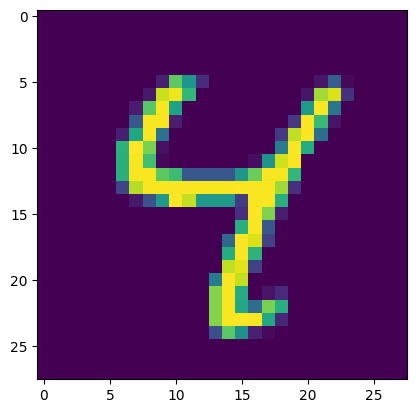

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
[[9.0493421e-07 9.1584807e-04 3.6390040e-05 1.0040912e-05 9.9648595e-01
  1.0132681e-05 3.0147925e-05 3.5906982e-04 2.4325798e-05 2.1272022e-03]]

The number is given below : 
[4]


In [7]:
from keras.models import load_model

# load model
model_pred_rnn = load_model("mnist_gru_model.keras") # Changed the filename to match the saved model
#load data
(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

n1 = int(input("Enter a image sample id (0-9999):"))

# display the image from the mnnist database below
fig1=plt.figure()
plt.imshow(xtest1[n1])
plt.show(fig1)

# Input
sample = xtest[n1].reshape((1, 28, 28)) / 255.0

target_sp = model_pred_rnn.predict(sample)
print(target_sp)
out = np.argmax(target_sp, axis=1)
print("\r\nThe number is given below : ")
print(out)